<a href="https://colab.research.google.com/github/myoshi1212/quantmacro/blob/main/HPfilterYM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

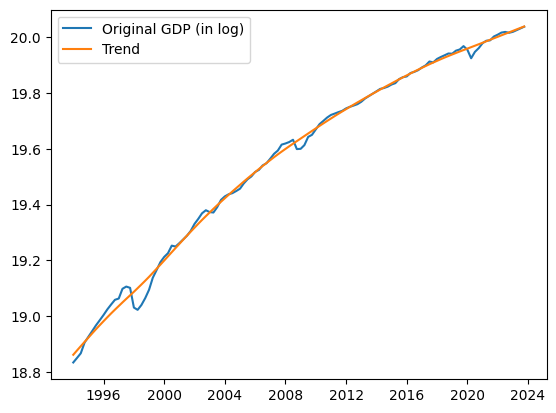

In [9]:

import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas_datareader as pdr
import numpy as np

# set the start and end dates for the data
start_date = '1994-01-01'
end_date = '2023-10-01'

# download the data from FRED using pandas_datareader
gdp = web.DataReader('NGDPRSAXDCKRQ', 'fred', start_date, end_date)
log_gdp = np.log(gdp)

# calculate the quarterly percent change in real GDP
gdp_pct_change = gdp.pct_change(4)

# apply a Hodrick-Prescott filter to the data to extract the cyclical component
cycle1, trend = sm.tsa.filters.hpfilter(log_gdp, lamb=1600)

# Plot the original time series data
plt.plot(log_gdp, label="Original GDP (in log)")

# Plot the trend component
plt.plot(trend, label="Trend")

# Add a legend and show the plot
plt.legend()
plt.show()


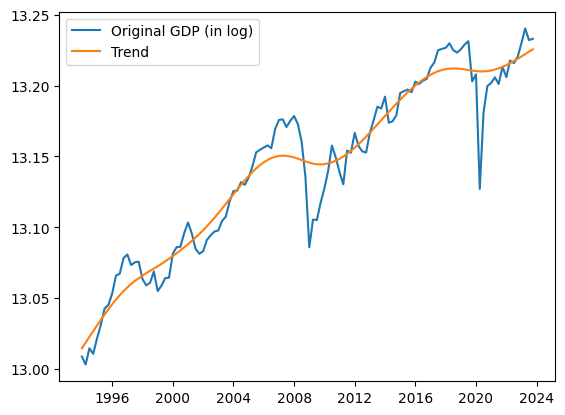

In [12]:
# set the start and end dates for the data
start_date = '1994-01-01'
end_date = '2023-10-01'

# download the data from FRED using pandas_datareader
gdp = web.DataReader('JPNRGDPEXP', 'fred', start_date, end_date)
log_gdp = np.log(gdp)

# calculate the quarterly percent change in real GDP
gdp_pct_change = gdp.pct_change(4)

# apply a Hodrick-Prescott filter to the data to extract the cyclical component
cycle2, trend = sm.tsa.filters.hpfilter(log_gdp, lamb=1600)

# Plot the original time series data
plt.plot(log_gdp, label="Original GDP (in log)")

# Plot the trend component
plt.plot(trend, label="Trend")

# Add a legend and show the plot
plt.legend()
plt.show()


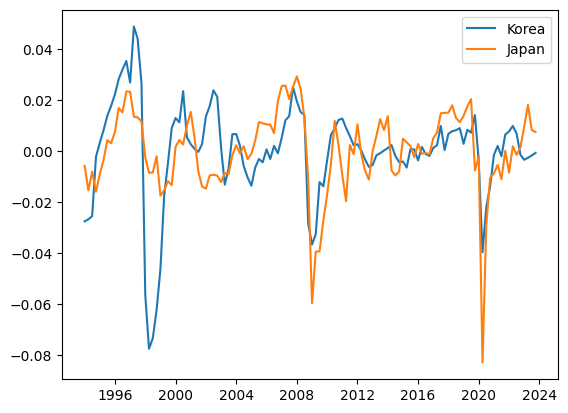

Cycle1 mean: -4.2602958198282675e-13
Cycle1 standard deviation: 0.019565476335040587
Cycle2 mean: -1.51271587848593e-13
Cycle2 standard deviation: 0.016067442069596816
correlation coefficient           cycle     cycle
cycle  1.000000  0.505665
cycle  0.505665  1.000000


In [21]:
# Plot the cycle component
plt.plot(cycle1, label="Korea")
plt.plot(cycle2, label="Japan")
# Add a legend and show the plot
plt.legend()
plt.show()

cycle1_mean = cycle1.mean()
cycle1_std = cycle1.std()
cycle2_mean = cycle2.mean()
cycle2_std = cycle2.std()
df = pd.DataFrame([cycle1,cycle2]).T
coef = df.corr()


print("Cycle1 mean:", cycle1_mean)
print("Cycle1 standard deviation:", cycle1_std)
print("Cycle2 mean:", cycle2_mean)
print("Cycle2 standard deviation:", cycle2_std)
print("correlation coefficient",coef)